# Chapter 4 Roundoff and Truncation Errors

*Mechanical*  **engineering** 

---
- Numerical method
- Fluid mechanics
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
1.111

1.111

## Errors

$$\epsilon_t = \frac{\mbox{true value} - \mbox{approximation} }{\mbox{true value}}$$

$$\epsilon_{a,r} = \mbox{present approximation} - \mbox{previous approximation}$$

$$\epsilon_{a, a} = \frac{\mbox{present approximation} - \mbox{previous approximation} }{\mbox{present approximation}}$$

In [12]:
a = 11
x = 1
while 1:
    xold = x
    x = (x + a/x)/2
    e = (x-xold)/x
    if np.abs(e) < 1e-6:
        break
        
print(x, e)

3.3166247903554 -4.485333639353768e-09


## Review of Taylor Series

$$\begin{align} f(x) &= f(c) + f'(c) (x-c) + \frac{1}{2!} f''(c) (x-c)^2 + \frac{1}{3!} f'''(c) (x-c)^3 + \cdots \\
                     &= \sum_{k=0}^{\infty} \frac{1}{k!} f^{(k)}(c) (x-c)^k \end{align}$$

If $c=0$, MacLaurin series

$$\begin{align} f(x) &= f(0) + f'(0) x + \frac{1}{2!} f''(0) x^2 + \frac{1}{3!} f'''(0) x^3 + \cdots \\
                     &= \sum_{k=0}^{\infty} \frac{1}{k!} f^{(k)}(0) x^k \end{align}$$
Familar examples of MacLaurin series                     
$$\begin{align} e^x     &= \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots \\
                \sin(x) &= \sum_{k=0}^{\infty} (-1)^k \frac{x^{2k+1}}{(2k+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} + \cdots \\
                \cos(x) &= \sum_{k=0}^{\infty} (-1)^k \frac{x^{2k}}{(2k)!} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} + \cdots \\
                \frac{1}{1-x} &= \sum_{k=0}^{\infty} x^k  = 1 + x + x^2 + x^3 + \cdots \\
\end{align}$$                     

                     
                     
                     

## Example 4.1 반복법에서 오차 추정

Maclaurin series
$$ e^x = 1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!} $$

In [4]:
x = 0.5
ye = np.exp(x)
print(ye)
y1 = 1 + x
y2 = y1 + x**2/(2*1)
y3 = y2 + x**3/(3*2*1)
y4 = y3 + x**4/(4*3*2*1)

print(y1, y2, y3, y4)
print(np.abs((y1-ye)/ye), np.abs((y2-ye)/ye), np.abs((y3-ye)/ye), np.abs((y4-ye)/ye))
print(np.abs((y1-y2)/y2), np.abs((y2-y3)/y3), np.abs((y3-y4)/y4))

1.6487212707001282
1.5 1.625 1.6458333333333333 1.6484375
0.09020401043104989 0.014387677966970715 0.0017516225562908972 0.00017211562995586948
0.07692307692307693 0.012658227848101222 0.00157977883096371


In [13]:
def exp(x, tol=1e-6):
    true = np.exp(x)
    
    s = 1 + x
    f = 1
    xx = x
    i = 1
    while 1:
        i += 1
        f *= i
        xx *= x        
        term = xx/f
        s += term       
        
        e_t = (true - s)/true
        e_aa = term
        e_ar = term/s
        
        print(fmt2.format(i+1, s, e_t, e_aa, e_ar))
        
        if np.abs(term) < tol:
            return s

fmt1 = '{:>5s}' + '{:>15s}'*4
fmt2 = '{:5d}' + '{:15.5e}'*4

print(fmt1.format('no', 'approx.', 'e_t', 'e_aa', 'e_ar'))       
        
x = 0.5
print(exp(x), np.exp(x))

   no        approx.            e_t           e_aa           e_ar
    3    1.62500e+00    1.43877e-02    1.25000e-01    7.69231e-02
    4    1.64583e+00    1.75162e-03    2.08333e-02    1.26582e-02
    5    1.64844e+00    1.72116e-04    2.60417e-03    1.57978e-03
    6    1.64870e+00    1.41649e-05    2.60417e-04    1.57953e-04
    7    1.64872e+00    1.00238e-06    2.17014e-05    1.31626e-05
    8    1.64872e+00    6.21969e-08    1.55010e-06    9.40183e-07
    9    1.64872e+00    3.43549e-09    9.68812e-08    5.87614e-08
1.6487212650359622 1.6487212707001282


## Roundoff Errors


In [14]:
print(0.1 - 0.09)

0.010000000000000009


In [15]:
s = 0.0
for i in range(100000):
    s = s + 0.00001
print(s)

0.9999999999980838


## Truncation Error

$$f(x+h) \approx f(x) + f'(x) h + \frac{f''(x)}{2} h^2 + \frac{f^{(3)}(x)}{3!} h^3 + \cdots + \frac{f^{(n)}(x)}{n!} h^n + R_n$$
$$R_n = \frac{f^{(n+1)}}{(n+1)!} h^{n+1}$$


## Example 4.3

$f(x) = \cos(x)$, $x = \pi/4$, $h = \pi/3 - \pi/4$

$$  \cos(x) = \sum_{k=0}^{\infty} (-1)^k \frac{x^{2k}}{(2k)!} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} + \cdots $$

   no        approx.            e_t           e_aa           e_ar
    2    5.21987e-01    4.39733e-02    1.85120e-01    3.54645e-01
    3    4.97754e-01    4.49102e-03    2.42322e-02    4.86830e-02
    4    4.99869e-01    2.61706e-04    2.11466e-03    4.23042e-03
    5    5.00008e-01    1.51016e-05    1.38404e-04    2.76804e-04
    6    5.00000e-01    6.08001e-07    7.24681e-06    1.44936e-05
    7    5.00000e-01    2.44027e-08    3.16202e-07    6.32404e-07


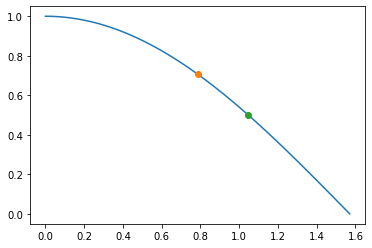

In [16]:
x = np.linspace(0, np.pi/2)
plt.plot(x, np.cos(x))

x = np.pi/4
h = np.pi/3 - x

plt.plot(x, np.cos(x), 'o',  x+h, np.cos(x+h), 'o')

true = np.cos(x+h)

C, S = np.cos(x), np.sin(x)
f = [C, -S, -C, S]

p = C
cc = 1
hh = 1

fmt1 = '{:>5s}' + '{:>15s}'*4
fmt2 = '{:5d}' + '{:15.5e}'*4
print(fmt1.format('no', 'approx.', 'e_t', 'e_aa', 'e_ar'))       

for i in range(1, 10):
    ff = f[i % 4]
    cc *= i
    hh *= h
    term = ff/cc * hh
    p += term
    
    e_t = np.abs((p - true)/true)
    e_aa = np.abs(term)
    e_ar = np.abs(term/p)
    
    print(fmt2.format(i+1, p, e_t, e_aa, e_ar))
    
    if e_ar < 1e-6:
        break

## Example 4.4

$$f(x) = -0.1 x^4 - 0.15 x^3 -0.5 x^2 - 0.25 x + 1.2$$

$$ \frac{df}{dx} = -0.4 x^3 - 0.45 x^2 - 1 x - 0.25 $$

Estimate the first derivative at $x = 0.5$, $h = 0.25$

- forward difference
$$ f'(x_i) = \frac{f(x_{i+1}) - f(x_i)}{h} + O(h)$$
- backward difference
$$ f'(x_i) = \frac{f(x_{i}) - f(x_{i-1})}{h} + O(h)$$
- central difference
$$ f'(x_i) = \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + O(h^2)$$



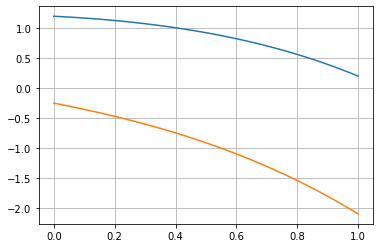

In [23]:
import numpy as np
import matplotlib.pyplot as plt

p = np.poly1d([-0.1, -0.15, -0.5, -0.25, 1.2])

x = np.linspace(0, 1, 100)
y = np.polyval(p, x)
plt.plot(x,y)

dp = np.polyder(p)
dy = np.polyval(dp, x)
plt.plot(x, dy)

plt.grid()
plt.show()

In [27]:
def f(x):
    p = np.poly1d([-0.1, -0.15, -0.5, -0.25, 1.2])
    return np.polyval(p, x)

x = 0.5
h = 0.01
df_f = (f(x+h) - f(x))   / h
df_b = (f(x)   - f(x-h)) / h
df_c = (f(x+h) - f(x-h)) / (2*h)
df = np.polyval(np.polyder(p), x)

print("forward difference  {:15.5f}{:15.5e}".format(df_f, (df_f - df)/df))
print("backward difference {:15.5f}{:15.5e}".format(df_b, (df_b - df)/df))
print("central difference  {:15.5f}{:15.5e}".format(df_c, (df_c - df)/df))

forward difference         -0.92129    9.62751e-03
backward difference        -0.90378   -9.55079e-03
central difference         -0.91254    3.83562e-05


## Example 4.5 Roundoff and Truncation Error in Numerical Differentiation

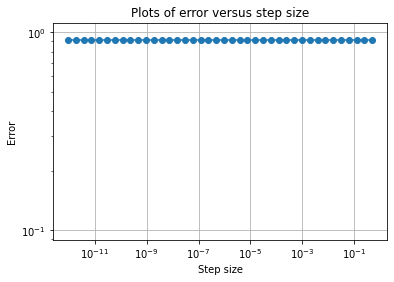

In [17]:
x = 0.5
p = np.poly1d([-0.1, -0.15, -0.5, -0.25, 1.2])
df = np.polyval(np.polyder(p), x)

def f(x):
    return np.polyval(p, x)

s = np.empty((40, 2))
h = 1
for i in range(40):
    h = h/2
    df_c = (f(x+h) - f(x + h)) / (2*h)
    error = np.abs(df_c - df)
    s[i] = [h, error]

import matplotlib.pyplot as plt
plt.loglog(s[:,0], s[:,1], 'o-')
plt.title("Plots of error versus step size")
plt.xlabel("Step size")
plt.ylabel("Error")
plt.grid()
plt.show()

In [28]:
# machine epsilon
e = 1.0
while 1 + e > 1.0:
    e = e/2.
print(e)     

1.1102230246251565e-16
